In [1]:
import findspark
findspark.init()
from pyspark import SparkContext
from pyspark.sql import SparkSession
sc = SparkContext("local")
spark = SparkSession.builder.getOrCreate()

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import numpy as np

# Simple linear regression
Linear regression with only a slope, also known as simple linear regression, is a statistical technique used to model the relationship between a dependent variable and an independent variable when the relationship can be approximated by a straight line. In this case, we are considering a linear regression model with a single predictor variable and no intercept term.

To perform linear regression with only a slope, we need a set of paired observations (x, y), where x represents the independent variable (predictor) and y represents the dependent variable (response). The goal is to estimate the slope of the line that best fits the data points.

The formula for the simple linear regression model is:

$$y = \beta \cdot x + \epsilon$$

where:
- y is the dependent variable
- x is the independent variable
- β is the slope of the line
- ε is the error term representing the random variation or noise in the data

## Generate data

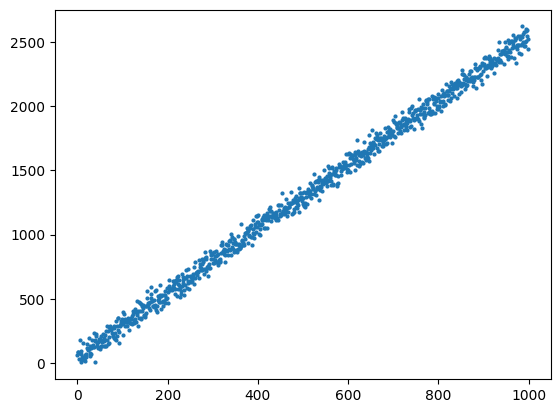

In [3]:
# Let us create some random data
size= 1000
mu, sigma = 50, 50 # mean and standard deviation
error=np.random.normal(mu, sigma, size)
x1 = np.arange(0, size)
y = 2.5*x1 + error
plt.plot(x1, y, 'o', markersize=2)
plt.show()

In [4]:
myRDD = sc.parallelize(zip(y,x1))
myRDD.take(5)

[(66.90170693047781, 0),
 (82.71199317464149, 1),
 (83.94589819896242, 2),
 (77.93855078069687, 3),
 (31.748628804364543, 4)]

## Calculating the slope using sklearn. 
The fit() method returns an instance of the LinearRegression class, which contains the slope of the line in its coef_ attribute.

In [5]:
from sklearn.linear_model import LinearRegression

X = np.stack([x1], axis=1)
reg = LinearRegression(fit_intercept=False).fit(X, y)
print(reg.coef_)

C:\Users\dimit\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[2.57606592]


## Calculating the slope using linear algebra.
Calculate the coefficients of a linear regression model using the normal equation approach

$$
\hat{\beta} = (X^T \cdot X)^{-1} \cdot X^T \cdot y
$$

Where:
- $\hat{\beta}$ represents the estimated coefficients of the linear regression model.
- $X$ is the matrix of input variables.
- $X^T$ denotes the transpose of $X$.
- $y$ is the vector of dependent variable values.
- $(X^T \cdot X)^{-1}$ represents the inverse of the matrix product $X^T \cdot X$.

In [6]:
# Let use solve this also with the exact linear algebra solution. 
beta_hat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(beta_hat)

[2.57606592]


## Calculating the slope using gradient descent
Gradient descent is an iterative optimization algorithm used to find the minimum value of a function. In the context of machine learning, we can use gradient descent to find the optimal values of the coefficients in a parameterized model.

1. Calculation of the prediction with current regression coefficients:
   - Prediction: $y_{\text{prediction}} = m_{\text{current}} \cdot x_1$

2. Computation of the cost (for monitoring purposes):
   - Cost: $cost = \frac{-1}{2n} \sum (y - y_{\text{prediction}})^2$

3. Calculation of the gradient:

$$
\begin{align*}
m_{\text{gradient}} & = \frac{\partial }{\partial m} \left(\frac{-1}{2n} \sum (y - mx)^2 \right) \\
& = \frac{-1}{2n}\sum \frac{\partial }{\partial m} (y - mx)^2 \\
& = \frac{-1}{2n}\sum 2(y - mx)(-x) \\
& = \frac{-1}{n} \sum x(y - mx) \\
\end{align*}
$$

   The final formula for gradient is: $m_{\text{gradient}} = \frac{-1}{n} \sum (x \cdot (y - mx))$

4. Update of the regression coefficient:
   - Updated coefficient: $m_{\text{current}} = m_{\text{current}} - \text{learningRate} \cdot m_{\text{gradient}}$

Here, the variable $n$ represents the number of data points in the dataset, $y$ is the dependent variable, $x_1$ is the independent variable, $m_{\text{current}}$ is the current value of the coefficient, and $\text{learningRate}$ is the learning rate (step size) used in the gradient descent algorithm.

In [7]:
# Now, we do gradient descent here with a very simple numpy array 
learningRate = 0.000001
num_iteration = 30 
m_current=0
n = float(size)

# Let's start with main iterative part of gradient descent algorithm 
for i in range(num_iteration):
    # Calculate the prediction with current regression coefficients. 
    y_prediction = m_current * x1 
    # We compute costs just for monitoring 
    cost= sum (( y - y_prediction)**2)/size
    # calculate gradients. 
    m_gradient = (-1/n) * sum (x1 * (y - y_prediction) )
    print(i , "m=", m_current, " Cost=", cost)
    # update the weights - Regression Coefficients 
    m_current = m_current - learningRate * m_gradient 

0 m= 0  Cost= 2211666.205370336
1 m= 0.857401037943558  Cost= 986071.1931786786
2 m= 1.429430287524728  Cost= 440545.2016897399
3 m= 1.8110690398654237  Cost= 197725.50641551375
4 m= 2.0656856305289324  Cost= 89643.75534781329
5 m= 2.2355572901638383  Cost= 41535.36405497435
6 m= 2.34888997077165  Cost= 20121.78322452314
7 m= 2.4245017386283814  Cost= 10590.359876960069
8 m= 2.4749473771481694  Cost= 6347.817177082452
9 m= 2.5086030172396816  Cost= 4459.41416486215
10 m= 2.5310569328447956  Cost= 3618.864949726242
11 m= 2.546037433130355  Cost= 3244.7271314250092
12 m= 2.5560319210741205  Cost= 3078.194221081883
13 m= 2.5626999086148547  Cost= 3004.068567724323
14 m= 2.56714856652445  Cost= 2971.074413749814
15 m= 2.570116562051692  Cost= 2956.388348303045
16 m= 2.5720967092396174  Cost= 2949.851416988683
17 m= 2.573417797108471  Cost= 2946.941756047596
18 m= 2.574299182678126  Cost= 2945.646633552818
19 m= 2.5748872136037835  Cost= 2945.0701601043747
20 m= 2.575279528138346  Cost= 294

## Calculating the slope using gradient descent in PySpark
- `myRDD` contains tuples $(y,x)$ with the dependent variable $y$ as the first element `t[0]` and the independent variable $x$ as the second element `t[1]`. 
- `size` represents the size of the RDD
- `learningRate` represents the learning rate (step size) used in the gradient descent algorithm.
- `beta` represents the current value of the coefficient.
- `gradient` represents the gradient of the cost function.
- `cost` represents the cost of the current loss function.

The formula for the gradient calculation is: 

$m_{\text{gradient}} = \frac{-1}{n} \sum (x \cdot (y - mx))$

$cost = \frac{-1}{2n} \sum (y - y_{\text{prediction}})^2 =\frac{-1}{2n} \sum (y - mx)^2$

In [9]:
myRDD.take(5)

[(66.90170693047781, 0),
 (82.71199317464149, 1),
 (83.94589819896242, 2),
 (77.93855078069687, 3),
 (31.748628804364543, 4)]

### Simple implementation in pySpark using exact formula

In [ ]:
# Now we do gradient Decent on our RDD data set. 
learningRate = 0.000001
num_iteration = 30 

m = 0
myRDD.cache()

# Let's start with main iterative part of gradient descent algorithm 
for i in range(num_iteration):

    gradientCost=myRDD.map(lambda x: (x[1]*(x[0] - x[1] * m) , (x[0] - x[1] * m)**2))\
                        .reduce(lambda x, y: (x[0] +y[0], x[1]+y[1] ))
    cost= gradientCost[1]/(size)
    gradient=(-1.0/float(size))* gradientCost[0]
    print(i, "m", m, " Cost", cost)
    m = m - learningRate * gradient    

0 m 0  Cost 2211666.205370336
1 m 0.857401037943558  Cost 986071.1931786786
2 m 1.429430287524728  Cost 440545.2016897399
3 m 1.8110690398654237  Cost 197725.50641551375
4 m 2.0656856305289324  Cost 89643.75534781329
5 m 2.2355572901638383  Cost 41535.36405497435
6 m 2.34888997077165  Cost 20121.78322452314
7 m 2.4245017386283814  Cost 10590.359876960069
8 m 2.4749473771481694  Cost 6347.817177082452
9 m 2.5086030172396816  Cost 4459.41416486215
10 m 2.5310569328447956  Cost 3618.864949726242
11 m 2.546037433130355  Cost 3244.7271314250092
12 m 2.5560319210741205  Cost 3078.194221081883
13 m 2.5626999086148547  Cost 3004.068567724323
14 m 2.56714856652445  Cost 2971.074413749814
15 m 2.570116562051692  Cost 2956.388348303045
16 m 2.5720967092396174  Cost 2949.851416988683
17 m 2.573417797108471  Cost 2946.941756047596
18 m 2.574299182678126  Cost 2945.646633552818
19 m 2.5748872136037835  Cost 2945.0701601043747
20 m 2.575279528138346  Cost 2944.8135653512963
21 m 2.575541267253269  Co

### Optimization of the code 
We can do a small optimization by calculating only once the $(y - mx)$ expression that is part of the gradient and cost calculation, and then we can use it in both calculations in the second map step.

In [14]:
# Now we do gradient Decent on our RDD data set. 
learningRate = 0.000001
num_iteration = 30 

m = 0
myRDD.cache()

# Let's start with main iterative part of gradient descent algorithm 
for i in range(num_iteration):
  
    gradientCost=myRDD.map(lambda x: (x[1], (x[0] - x[1] * m) ))\
                        .map(lambda x: (x[0]*x[1], x[1]**2 ))\
                        .reduce(lambda x, y: (x[0] +y[0], x[1]+y[1] ))
    cost= gradientCost[1]/(size)
    gradient=(-1.0/float(size))* gradientCost[0]
    print(i, "m", m, " Cost", cost)
    m = m - learningRate * gradient    

0 m 0  Cost 2211666.205370336
1 m 0.857401037943558  Cost 986071.1931786786
2 m 1.429430287524728  Cost 440545.2016897399
3 m 1.8110690398654237  Cost 197725.50641551375
4 m 2.0656856305289324  Cost 89643.75534781329
5 m 2.2355572901638383  Cost 41535.36405497435
6 m 2.34888997077165  Cost 20121.78322452314
7 m 2.4245017386283814  Cost 10590.359876960069
8 m 2.4749473771481694  Cost 6347.817177082452
9 m 2.5086030172396816  Cost 4459.41416486215
10 m 2.5310569328447956  Cost 3618.864949726242
11 m 2.546037433130355  Cost 3244.7271314250092
12 m 2.5560319210741205  Cost 3078.194221081883
13 m 2.5626999086148547  Cost 3004.068567724323
14 m 2.56714856652445  Cost 2971.074413749814
15 m 2.570116562051692  Cost 2956.388348303045
16 m 2.5720967092396174  Cost 2949.851416988683
17 m 2.573417797108471  Cost 2946.941756047596
18 m 2.574299182678126  Cost 2945.646633552818
19 m 2.5748872136037835  Cost 2945.0701601043747
20 m 2.575279528138346  Cost 2944.8135653512963
21 m 2.575541267253269  Co